# $2^3$ Factorial Designs
## Expanding our Efficient Designs to Three Factors
### Dr Austin R Brown
### School of Data Science and Analytics
#### Kennesaw State University

In [43]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Fractional Factorial Design"
#os.chdir(today_dir)
#print(f"📂 Changed directory to: {os.getcwd()}")

## Introduction

- In the last section, we were introduced to the concept of a $2^2$ factorial design.

- In this section, we will extend this concept to a $2^3$ factorial design, in which we have three treatment factors, each with two levels.

- As before, we'll begin with a scenario and work through the analysis steps, almost all of which we've familiarized ourselves with in other lectures.

## Experimental Example

- A chess app company called **Pawn Shop** is interested in understanding how different app features influences monthly user purchases (in dollars).

- The app development team has identified three key factors that could impact spending behavior: 
    - **A**: Subscription Type (Basic - vs Premium +) 
    - **B**: In-App Purchase Offers (No - vs Yes +) 
    - **C**: Personalized Coaching Feature (Off - vs On +)

- For each of the $2^3=8$ treatment combinations, suppose we randomly recruit $r=2$ customers to pilot the app. After a month of using the app, we record their monthly purchases.
    - The data are stored in the `2^3 Chess Example.xlsx` file.

## Considering the Data Structure

- The data structure for a $2^3$ factorial design is similar to that of a $2^2$ factorial design, but with an additional factor.

| Subscription (A) | App Offers (B) | Coaching (C) | Rep 1 | Rep 2 | Total |
| :----------: | :---------: | :------: | :----: | :----: | :---: |
| - | - | - | 1.40 | 3.21 | 4.61 |
| - | - | + | 18.43 | 16.75 | 35.18 |
| - | + | - | 24.73 | 15.45 | 40.18 |
| - | + | + | 45.19 | 41.87 | 87.06 |
| + | - | - | 21.54 | 21.03 | 42.57 |
| + | - | + | 36.15 | 33.84 | 69.99 |
| + | + | - | 43.13 | 37.97 | 81.10 |
| + | + | + | 56.96 | 64.44 | 121.40 |

#### Considering the Context: Overall Goal and Variable Specification

- As we've done before, we can work out the roadmap of our experiment:

    - We are trying to quantify the effect the main effects (Subscription Type, In-App Purchase Offers, and Personalized Coaching Feature) as well as their interaction have on our outcome, monthly user purchases.

- As was the case with our prior examples, you can imagine there likely being some lurking variables working with human participants, so hopefully we've done a good job sampling app users who are relatively homogeneous.

#### Considering the Context: Model Specification

- As before, we can write out our model for the $2^3$ factorial design:

$$ y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha\beta)_{ij} + (\alpha\gamma)_{ik} + \\
(\beta\gamma)_{jk} + (\alpha\beta\gamma)_{ijk} + \varepsilon_{ijkl} $$

- Note, we have added a third factor, $\gamma_k$, to account for the effect of treatment **C** and the corresponding two-way and three-way interaction terms between all three factors.

#### Considering the Context: Specifying Hypotheses

- Our hypotheses in this case would be the same as our hypotheses for a three-factor factorial design.

- For our main effects:

$$ H_{01}: \alpha_{\text{Basic}} = \alpha_{\text{Premium}} = 0 $$
$$ H_{11}: \text{At least one } \alpha_i \neq 0 $$

$$ H_{02}: \beta_{\text{No}} = \beta_{\text{Yes}} = 0 $$
$$ H_{12}: \text{At least one } \beta_j \neq 0 $$

$$ H_{03}: \gamma_{\text{Off}} = \gamma_{\text{On}} = 0 $$
$$ H_{13}: \text{At least one } \gamma_k \neq 0 $$

- For our two-way interactions:

$$ H_{04}: (\alpha\beta)_{ij} = 0 \text{ for all } i,j $$
$$ H_{14}: \text{At least one } (\alpha\beta)_{ij} \neq 0 $$

$$ H_{05}: (\alpha\gamma)_{ik} = 0 \text{ for all } i,k $$
$$ H_{15}: \text{At least one } (\alpha\gamma)_{ik} \neq 0 $$

$$ H_{06}: (\beta\gamma)_{jk} = 0 \text{ for all } j,k $$
$$ H_{16}: \text{At least one } (\beta\gamma)_{jk} \neq 0 $$

- For our three-way interaction:

$$ H_{07}: (\alpha\beta\gamma)_{ijk} = 0 \text{ for all } i,j,k $$
$$ H_{17}: \text{At least one } (\alpha\beta\gamma)_{ijk} \neq 0 $$

#### Considering the Context: Exploring the Data

- As always, we should begin our analysis by exploring the data and performing routine data analysis, beginning with summary statistics and visualizations.

In [1]:
## Import Relevant Packages ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in Chess Data ##

chess = pd.read_excel("2^3 Chess Example.xlsx")

## Data Integrity Check ##

print(chess.info())

## Exploratory Data Analysis ##
## Start with Main Effects ##

## Subscription ##

sub_stats = chess.groupby("Subscription")["Purchases"].agg(['mean', 'std'])

print(sub_stats)

## App_Offers ##

app_stats = chess.groupby("App_Offers")["Purchases"].agg(['mean', 'std'])

print(app_stats)

## Coaching ##

coach_stats = chess.groupby("Coaching")["Purchases"].agg(['mean', 'std'])

print(coach_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Purchases     16 non-null     float64
 1   Subscription  16 non-null     object 
 2   App_Offers    16 non-null     object 
 3   Coaching      16 non-null     object 
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes
None
                  mean        std
Subscription                     
Basic         20.87875  15.993848
Premium       39.38250  15.349375
                mean        std
App_Offers                     
No          19.04375  12.474985
Yes         41.21750  15.826393
              mean        std
Coaching                     
Off       21.05750  14.751965
On        39.20375  16.771198


##### Interpreting the Main Effects Summary Statistics

- So we can see that those with a premium subscription spend more per month, on average, then those with the basic subscription by about 1 standard deviation.

- Those who received the in-app purchase offers spent substantially more per month, on average, than those who did not receive the offers (~1.5 sd).

- Finally, those who had access to the personalized coaching feature spent more per month, on average, than those who did not have access (~1 sd).

- Now, let's look at the two-way interactions.

In [2]:
## Subscription x App_Offers ##

sub_app_stats = chess.groupby(["Subscription", "App_Offers"])["Purchases"].agg(['mean', 'std'])

print(sub_app_stats)

## Subscription x Coaching ##

sub_coach_stats = chess.groupby(["Subscription", "Coaching"])["Purchases"].agg(['mean', 'std'])

print(sub_coach_stats)

## App_Offers x Coaching ##

app_coach_stats = chess.groupby(["App_Offers", "Coaching"])["Purchases"].agg(['mean', 'std'])

print(app_coach_stats)

                            mean        std
Subscription App_Offers                    
Basic        No           9.9475   8.882201
             Yes         31.8100  14.118593
Premium      No          28.1400   7.974171
             Yes         50.6250  12.210794
                          mean        std
Subscription Coaching                    
Basic        Off       11.1975  10.969708
             On        30.5600  15.053305
Premium      Off       30.9175  11.322295
             On        47.8475  15.181022
                        mean        std
App_Offers Coaching                    
No         Off       11.7950  10.984967
           On        26.2925  10.116213
Yes        Off       30.3200  12.582840
           On        52.1150  10.460964


##### Interpreting the Two-Way Interactions Summary Statistics

###### Subscription Type and In-App Purchase Offers

- Within the Basic subscription, the difference in means is around 20.

- Within the Premium subscription, the difference is about the same (~20).

- This rough equivalency indicates a lack of a significant two-way interaction effect between Subscription and App Offers.

###### Subscription Type and Personalized Coaching Feature

- Within the Basic subscription, the difference in means is again around 20.

- Within the Premium subscription, the difference is about the same (~20).

- This rough equivalency again likely indicates a lack of a significant two-way interaction effect between Subscription and Coaching.

###### In-App Purchase Offers and Personalized Coaching Feature

- Within the No App Offers group, the difference in means is around 15.

- Within the Yes App Offers group, the difference in means is over 20.

- Because the difference in differences is notable (15 vs 20), this may suggest a significant two-way interaction effect between App Offers and Coaching.

- Let's calculate and interpret the three-way interaction summary statistics.

In [4]:
## Subscription x App_Offers x Coaching ##

sub_app_coach_stats = chess.groupby(["Subscription", "App_Offers", "Coaching"])["Purchases"].agg(['mean', 'std'])

print(sub_app_coach_stats)

                                    mean       std
Subscription App_Offers Coaching                  
Basic        No         Off        2.305  1.279863
                        On        17.590  1.187939
             Yes        Off       20.090  6.561951
                        On        43.530  2.347595
Premium      No         Off       21.285  0.360624
                        On        34.995  1.633417
             Yes        Off       40.550  3.648671
                        On        60.700  5.289159


##### Interpreting the Three-Way Interaction Summary Statistics

- **Basic Subscription:**
    - For the No App Offers group, the difference in means (due to Coaching) is around 15.
    - For the Yes App Offers group, the difference in means (due to Coaching) is around 13. (Difference in differences: 15−13=2).

- **Premium Subscription:**
    - For the No App Offers group, the difference in means (due to Coaching) is around 14.
    - For the Yes App Offers group, the difference in means (due to Coaching) is around 20. (Difference in differences: 14−20=−6).

- **Implication:** The effect of Coaching appears to be nearly constant under the Basic subscription (15 vs. 13), but it changes noticeably under the Premium subscription (14 vs. 20). This difference in the pattern across the Subscription levels (a difference of 2 vs. a difference of −6) may suggest a small three-way interaction, but as noted, it's difficult to confirm without statistical testing.

- Let's build some visualizations to help us better understand these effects. Note, the below code is a little complex. We'll walk through the steps together.

- Further note that we are using the `plotnine` package in Python, which is similar to `ggplot2` in R.

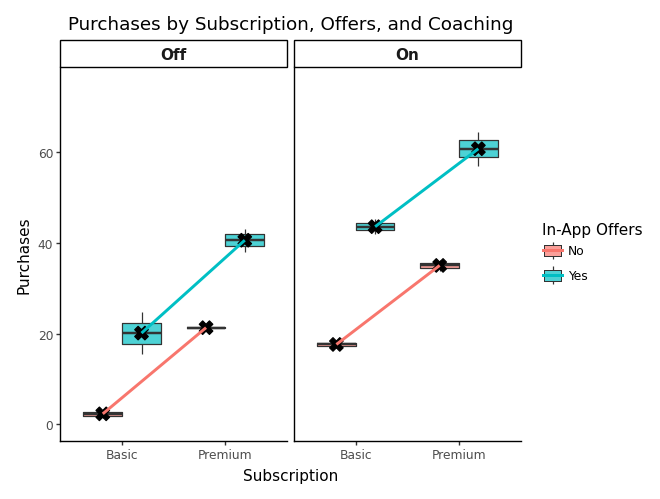

In [5]:
## Install plotnine
#%pip install plotnine
## Import all plotnine functions ##:
from plotnine import *

# Prepare summarized data
chess_means = sub_app_coach_stats.reset_index()[["Subscription", "App_Offers", "Coaching", "mean"]]

# Define dodge position for aligning points/lines with the boxplots
box_dodge = position_dodge(0.75)

# Build a single faceted plot
p = (
    ggplot(chess, aes(x='Subscription', y='Purchases')) +
    
    # 1. Boxplot layer (base visualization)
    geom_boxplot(aes(fill='App_Offers'), alpha=0.7, position=box_dodge) +
    
    # 2. Mean points (using separate summary data)
    geom_point(
        data=chess_means,
        mapping=aes(y='mean', group='App_Offers'),
        shape='X',
        size=5,
        position=box_dodge,
        color='black'
    ) +
    
    # 3. Mean lines
    geom_line(
        data=chess_means,
        mapping=aes(y='mean', group='App_Offers', color='App_Offers'),
        size=1.2,
        position=box_dodge
    ) +
    
    # 4. Facet by Coaching (two panels side-by-side)
    facet_wrap('~Coaching', ncol=2) +
    
    # 5. Styling and labels
    labs(
        title = "Purchases by Subscription, Offers, and Coaching",
        x = "Subscription",
        y = "Purchases",
        fill = "In-App Offers",
        color = "In-App Offers"
    ) +
    
    theme_classic() +
    theme(
        plot_title = element_text(hjust=0.5),
        strip_text = element_text(size=11, weight='bold')
    ) +
    
    scale_y_continuous(limits=(0, 75))
)

# Display
p

- **Interpreting the Main Effects:**

    - **Subscription:** There is a clear jump in monthly purchases (Y-axis) when moving from the Basic to the Premium subscription level.

    - **App Offers:** Within each subscription type, users who received the in-app offers consistently spent more per month than those who did not.
    
    - **Coaching:** Across the plots, the Received Coaching group (right plot) shows an overall increase in monthly purchases compared to the Did Not Receive Coaching group (left plot). This suggests that Coaching may have a significant main effect on monthly purchases.

- **Interpreting the Two-Way Interactions:**

    - The slopes of the interaction lines (the connection between 'No App Offers' and 'Yes App Offers' across the Basic and Premium x-axis points) within each coaching group are approximately the same.
    
    - Conclusion: This suggests a lack of a significant two-way interaction effect between Subscription and App Offers.

- **Interpreting the Three-Way Interaction:**

    - Comparing the slopes of the interaction lines between the two coaching groups (left plot vs. right plot), the change in slope appears slightly different.

    - Conclusion: This visual difference may suggest a small three-way interaction effect between Subscription, App Offers, and Coaching.

#### Considering the Context: Building the Model and Testing the Assumptions

- Let's go ahead and build our three-way factorial ANOVA model and test the assumptions, as we've done before.

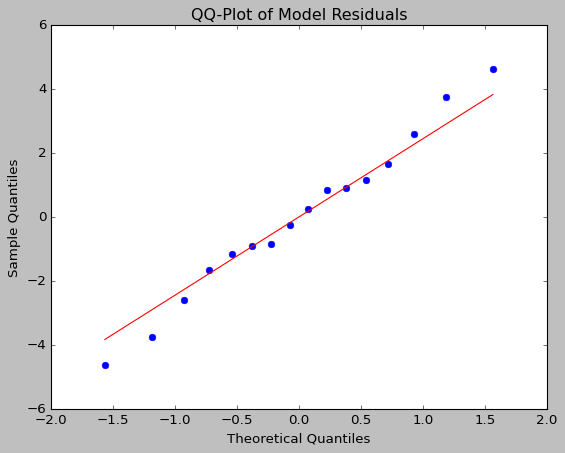

Shapiro-Wilk Test Results:
Statistic: 0.9879750956498441
p-value: 0.9974809943688328
Fail to reject the null hypothesis - Residuals are normally distributed.


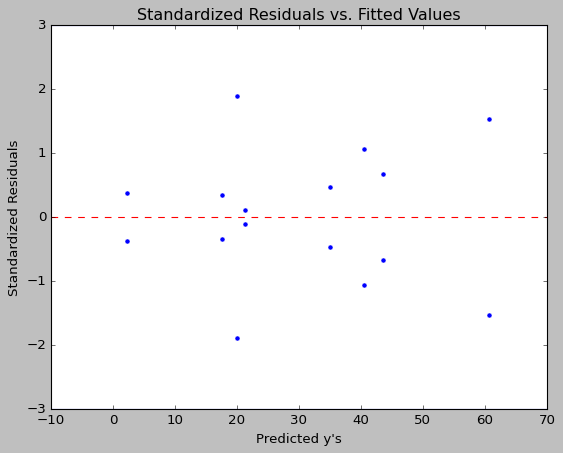

F-statistic: 8.305414645935093e+27
F p-value: 8.411391997298169e-111
Reject the null hypothesis - Variances are not equal.


In [7]:
## Import Statsmodels ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

## Fit Full Factorial Model ##

model = ols('Purchases ~ Subscription*App_Offers*Coaching', data=chess).fit()

## Parse out model residuals ##

residuals = model.resid

## Test of Normality ##

## QQ-Plot ##

sm.qqplot(residuals, line='s')
plt.title("QQ-Plot of Model Residuals")
plt.show()

## Shapiro-Wilk Test ##

shapiro_test = stats.shapiro(residuals)

print("Shapiro-Wilk Test Results:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue < 0.05:
    print("Reject the null hypothesis - Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis - Residuals are normally distributed.")

## Test of Homogeneity of Variance ##

## Scatterplot of Standardized Residuals vs. Fitted Values ##

## Get Standardized Residuals ##

standardized_residuals = model.get_influence().resid_studentized_internal

## Get Fitted Values ##

fitted_values = model.fittedvalues

## Scatterplot ##

## Create the plot ##

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

## B-P Test ##

## Run B-P Test ##

bp_test = het_breuschpagan(residuals, model.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")
if f_p_value < 0.05:
    print("Reject the null hypothesis - Variances are not equal.")
else:
    print("Fail to reject the null hypothesis - Variances are equal.")


- Since all of our points fall along the diagonal line in the QQ plot, and since the p-value associated with the S-W test is greater than 0.05, we have no evidence to suggest that the normality assumption has been violated.

- For constant variance, (1) none of our points are greater than +3 or less than -3, (2) the points appear randomly scattered around the horizontal line at 0, and (3) the spread of points appears roughly constant across all fitted values. However, the B-P test p-value is less than 0.05, suggesting a violation of the constant variance assumption. However, since the visual diagnostics appear to support the assumption, and since the sample size is so small, we will proceed with the analysis.

In [8]:
## Print ANOVA Table Results ##

anova_table = sm.stats.anova_lm(model, typ=3)

## Add Significance Column ##

anova_table["Significance"] = np.where(anova_table["PR(>F)"] < 0.05, "Significant", "Not Significant")

## Print Table Minus Intercept and Residual Rows ##

print(anova_table.drop(index=["Intercept", "Residual"]))

                                      sum_sq   df          F    PR(>F)  \
Subscription                      360.240400  1.0  30.112331  0.000582   
App_Offers                        316.306225  1.0  26.439893  0.000883   
Coaching                          233.631225  1.0  19.529128  0.002229   
Subscription:App_Offers             1.095200  1.0   0.091547  0.769937   
Subscription:Coaching               1.240313  1.0   0.103677  0.755714   
App_Offers:Coaching                33.252012  1.0   2.779521  0.134035   
Subscription:App_Offers:Coaching    0.735306  1.0   0.061464  0.810442   

                                     Significance  
Subscription                          Significant  
App_Offers                            Significant  
Coaching                              Significant  
Subscription:App_Offers           Not Significant  
Subscription:Coaching             Not Significant  
App_Offers:Coaching               Not Significant  
Subscription:App_Offers:Coaching  Not Signi

- Let's start with the interpretation of our interaction effects.

- **Interaction Effects:**
     - The three-way interaction term (Subscription × App Offers × Coaching) was not statistically significant ($F=0.06$, $p=0.81$).

     - The two-way interaction terms (Subscription × App Offers, Subscription × Coaching, App Offers × Coaching) were also not statistically significant (all $p>0.05$).

     - This confirms the visual descriptive analysis and simplifies the model, allowing focus on the main effects.

- **Main Effects:**

     - The main effect of Subscription was statistically significant ($F=30.11$, $p=0.0006$).

     - The main effect of App Offers was statistically significant ($F=26.44$, $p=0.0009$).

     - The main effect of Coaching was statistically significant ($F=19.53$, $p=0.0022$).

- **Post-Hoc Testing:**

     - Since each main effect only contains two levels (e.g., Basic vs. Premium), post-hoc tests (like Tukey's HSD) are not necessary. The ANOVA result for the main effect already indicates a significant difference between those two means.

#### Considering the Context: Quantifying Effect Sizes

- Let's calculate the effect sizes for our significant main effects with partial $\eta^2$.

In [9]:
## Load pingouin ##
import pingouin as pg

## Fit ANOVA with pingouin ##

mod_p = pg.anova(dv='Purchases',between=["Subscription","App_Offers","Coaching"],data=chess,effsize="np2").round(4)

print(mod_p[["Source","np2"]])

                                 Source     np2
0                          Subscription  0.9347
1                            App_Offers  0.9536
2                              Coaching  0.9323
3             Subscription * App_Offers  0.0040
4               Subscription * Coaching  0.0582
5                 App_Offers * Coaching  0.3575
6  Subscription * App_Offers * Coaching  0.0076
7                              Residual     NaN


- **Partial $\eta^2$ Analysis:**

    - The main effects (Subscription, App Offers, and Coaching) all demonstrate large effect sizes.

    - The two-way interaction between App Offers and Coaching also shows a large effect size, but it is not as large as the main effects.

    - The remaining two-way and the three-way interactions have very small effect sizes.

    - Remember the interpretation of partial $\eta^2$: it represents the proportion of variance in the dependent variable (Purchases) that can be attributed to the independent variable (Subscription, App Offers, Coaching, etc.) while controlling for the other independent variables.